In [57]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("Student_Performance.csv")

In [59]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Se cargan y se muestran las primeras filas de un nuevo conjunto de datos que contiene seis columnas: `Hours Studied`, `Previous Scores`, `Extracurricular Activities`, `Sleep Hours`, `Sample Question Papers Practiced`, y `Performance Index`. Este DataFrame tiene un total de 10,000 filas. 

Las columnas parecen representar diversos factores que podrían influir en el `Performance Index` de los estudiantes. Por ejemplo, `Hours Studied` y `Previous Scores` son directamente numéricas, mientras que `Extracurricular Activities` es una variable categórica que indica la participación en actividades extracurriculares. Además, `Sleep Hours` y `Sample Question Papers Practiced` proporcionan más detalles sobre los hábitos de estudio de los estudiantes. Este análisis preliminar sugiere que se podrían realizar varias transformaciones y análisis para entender mejor cómo estos factores influyen en el `Performance Index`.


In [60]:
# Convertir "Extracurricular Activities" en valores binarios
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Mostrar las primeras filas del DataFrame para verificar la conversión
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


Se realiza la conversión de la columna `Extracurricular Activities` a valores binarios utilizando la función `map` de pandas. Los valores `Yes` se convierten a 1 y los valores `No` se convierten a 0. Esta transformación facilita el uso de la columna en modelos de machine learning que requieren datos numéricos.

Tras la conversión, se muestran las primeras filas del DataFrame para verificar que la transformación se haya realizado correctamente. Esta verificación es crucial para asegurar que los datos se han preprocesado adecuadamente antes de proceder con cualquier análisis o modelado adicional.


In [61]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


e realiza un resumen estadístico del DataFrame utilizando el método `describe()`. Este resumen incluye la media, desviación estándar, valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada una de las columnas del conjunto de datos. Este análisis proporciona una visión general de la distribución de los datos y ayuda a identificar posibles valores atípicos o anomalías. También se observa la centralidad y dispersión de los datos, lo cual es crucial para entender el comportamiento general de las variables antes de aplicar cualquier modelo de machine learning.

In [62]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Se muestran los tipos de datos de cada columna del DataFrame utilizando el método `dtypes`. Todos los atributos, excepto `Performance Index`, son de tipo `int64` (enteros), mientras que `Performance Index` es de tipo `float64` (flotante). Conocer los tipos de datos es crucial para el preprocesamiento y la manipulación adecuada de los datos en etapas posteriores del análisis.

In [63]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Verificamos la existencia de valores nulos en cada columna del DataFrame utilizando el método `isna().sum()`. Los resultados indican que no hay valores nulos en ninguna de las columnas (`Hours Studied`, `Previous Scores`, `Extracurricular Activities`, `Sleep Hours`, `Sample Question Papers Practiced`, `Performance Index`). La ausencia de valores nulos es importante para asegurar la integridad de los datos y evitar problemas durante el análisis y modelado.


<Figure size 2000x1500 with 0 Axes>

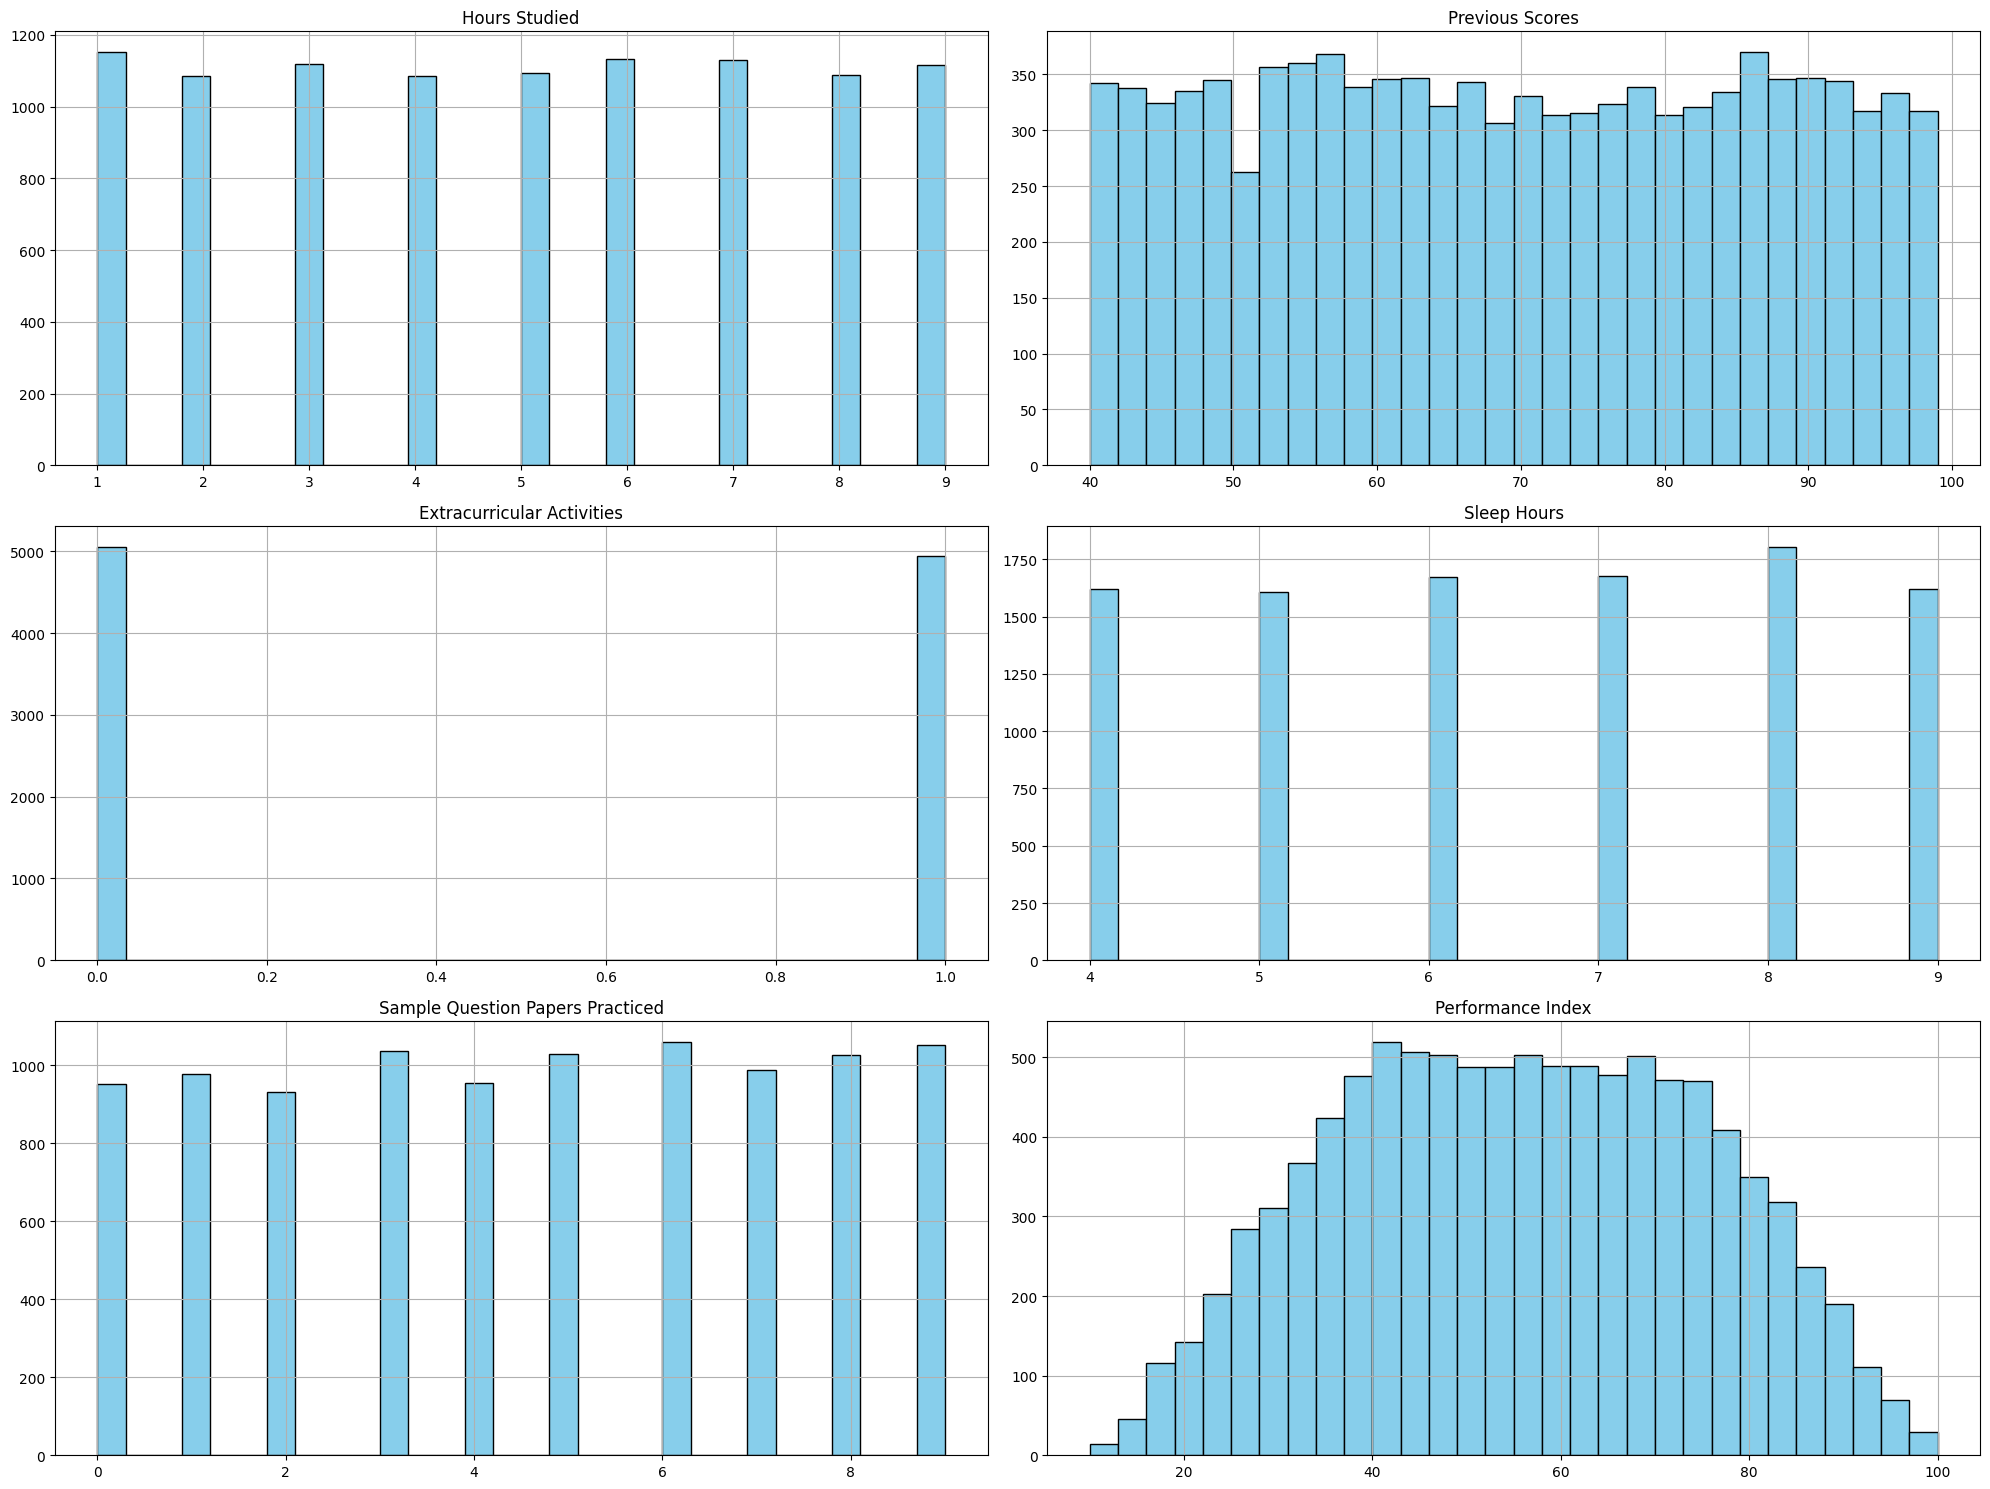

In [64]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear histogramas para cada columna del DataFrame
df.hist(bins=30, figsize=(20, 15), layout=(3, 2), edgecolor='black', color='skyblue')

# Ajustar el layout para que no se solapen los títulos y las etiquetas
plt.tight_layout()

# Mostrar la figura
plt.show()


Realizamos un análisis de las distribuciones de las columnas del DataFrame utilizando el método `hist()`, que genera histogramas para cada columna. Estos histogramas nos permiten visualizar la distribución de los datos en cada columna y obtener información importante sobre su comportamiento.

### Análisis de los Histogramas

1. **Hours Studied**:
   - La distribución de `Hours Studied` muestra una dispersión relativamente uniforme entre 1 y 9 horas. No hay un sesgo evidente, lo que sugiere que los estudiantes han reportado una variedad de horas de estudio diarias.

2. **Previous Scores**:
   - Los `Previous Scores` tienen una distribución ligeramente sesgada hacia la derecha, con más estudiantes obteniendo puntajes más altos. La mayoría de los puntajes se encuentran entre 40 y 99, con una concentración notable entre 60 y 100.

3. **Extracurricular Activities**:
   - La columna `Extracurricular Activities`, que ha sido convertida a valores binarios, muestra una distribución equilibrada entre 0 (No) y 1 (Sí). Esto indica que hay una participación similar en actividades extracurriculares entre los estudiantes.

4. **Sleep Hours**:
   - La distribución de `Sleep Hours` es casi uniforme entre 4 y 9 horas, con una leve concentración de estudiantes que duermen entre 6 y 8 horas. Esto sugiere que la mayoría de los estudiantes mantienen hábitos de sueño relativamente consistentes.

5. **Sample Question Papers Practiced**:
   - Los `Sample Question Papers Practiced` tienen una distribución variada, con algunos estudiantes practicando muy pocos (0-1) y otros hasta 9. Hay una ligera concentración hacia el centro (4-6), lo que podría indicar una práctica moderada entre la mayoría.

6. **Performance Index**:
   - La distribución de `Performance Index` tiene una forma casi normal, centrada alrededor de 55 con un rango de 10 a 100. La mayoría de los estudiantes tienen un índice de rendimiento entre 40 y 70, con algunos logrando índices más altos y bajos.

<Axes: >

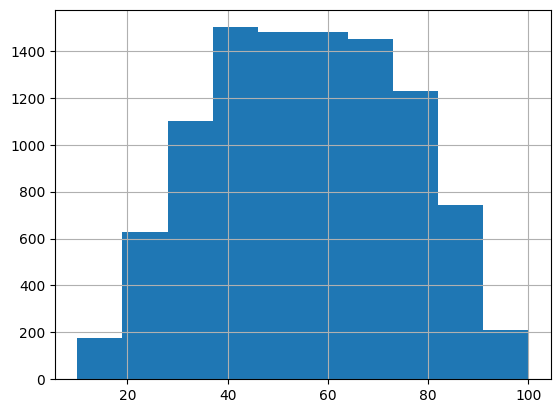

In [65]:
df["Performance Index"].hist()

### Interpretación de `Performance Index`

El `Performance Index` parece ser una métrica integral que evalúa el rendimiento general del estudiante. La distribución casi normal sugiere que la mayoría de los estudiantes tienen un rendimiento promedio, con menos estudiantes obteniendo índices extremadamente altos o bajos.

Para interpretar mejor el `Performance Index`, se puede considerar cómo se relaciona con las otras variables:
- **Hours Studied**: Más horas de estudio podrían correlacionarse con un mayor `Performance Index`.
- **Previous Scores**: Altos puntajes previos podrían predecir un alto `Performance Index`.
- **Extracurricular Activities**: La participación en actividades extracurriculares podría tener una influencia positiva o negativa en el `Performance Index` dependiendo de cómo equilibren estas actividades con los estudios.
- **Sleep Hours**: Un buen equilibrio en las horas de sueño podría correlacionarse con un mejor `Performance Index`.
- **Sample Question Papers Practiced**: Más práctica con exámenes de muestra podría estar asociada con un mayor `Performance Index`.

Realizar un análisis de correlación y regresión con estas variables podría proporcionar más información sobre cómo cada factor contribuye al `Performance Index` de los estudiantes.

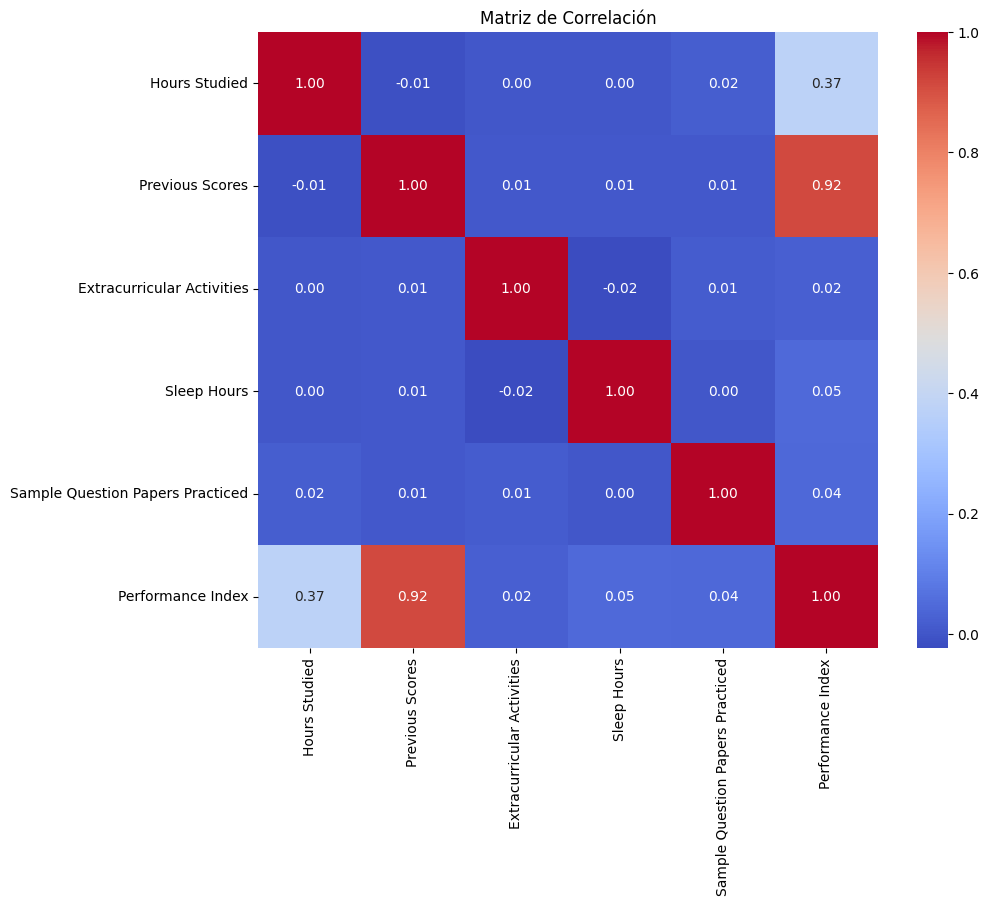

In [66]:
# Generar la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


**Factores Clave:** Los puntajes previos (Previous Scores) son el factor más fuertemente correlacionado con el índice de rendimiento (Performance Index), con una correlación de 0.92. Esto indica que el historial académico de los estudiantes es un predictor muy fuerte de su rendimiento futuro.

**Factores Moderados:**
Las horas de estudio (Hours Studied) tienen una correlación moderada con el índice de rendimiento (0.37), lo que sugiere que estudiar más horas puede mejorar el rendimiento, pero no es el único factor determinante.

**Factores Menores:** 
La participación en actividades extracurriculares (Extracurricular Activities), las horas de sueño (Sleep Hours) y la práctica de exámenes de muestra (Sample Question Papers Practiced) tienen correlaciones muy bajas con el índice de rendimiento. Esto indica que estos factores tienen un impacto menor en el rendimiento académico en comparación con los puntajes previos y las horas de estudi

El análisis de la matriz de correlación revela que los puntajes previos y las horas de estudio son los factores más importantes para predecir el rendimiento académico. Otros factores, como las actividades extracurriculares, las horas de sueño y la práctica de exámenes de muestra, tienen una influencia menor en el rendimiento. Este conocimiento puede ser útil para desarrollar estrategias educativas enfocadas en mejorar los puntajes previos y fomentar hábitos de estudio efectivos.

In [67]:
X = df.drop("Performance Index", axis=1) 
y = df["Performance Index"]

Separamos las características (variables independientes) de la variable objetivo (variable dependiente). 

- `X` contiene todas las columnas del DataFrame original excepto `Performance Index`. Estas columnas (`Hours Studied`, `Previous Scores`, `Extracurricular Activities`, `Sleep Hours`, `Sample Question Papers Practiced`) serán utilizadas como características para predecir el rendimiento de los estudiantes.
- `y` contiene únicamente la columna `Performance Index`, que es la variable que queremos predecir.

Esta separación es un paso crucial en el proceso de modelado de machine learning, ya que nos permite entrenar un modelo utilizando las características y evaluar su desempeño en predecir la variable objetivo.


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# 80% training and 20% test, random state es para que siempre se divida igual.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `sklearn.model_selection`.

- El 80% de los datos se utiliza para el entrenamiento del modelo (`X_train`, `y_train`).
- El 20% restante se utiliza para evaluar el desempeño del modelo (`X_test`, `y_test`).

El parámetro `random_state=42` se usa para asegurar que la división de los datos sea reproducible; es decir, cada vez que se ejecute este código con el mismo `random_state`, la división será idéntica.

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

**Importación de Bibliotecas**:
   - `StandardScaler`: Se utiliza para normalizar las características, asegurando que todas tengan una media de 0 y una desviación estándar de 1.
   - `LinearRegression`: Se utiliza como el modelo de regresión lineal para predecir el `Performance Index`.
   - `Pipeline`: Permite encadenar varios pasos de preprocesamiento y modelado en un solo objeto, facilitando el flujo de trabajo.
   - `mean_squared_error`, `r2_score`: Métricas para evaluar el rendimiento del modelo.

In [71]:
scaler = StandardScaler()
lr = LinearRegression()
# Crear el pipeline con escalado y regresión lineal
pipeline_lr = Pipeline([
    ('scaler', scaler),  # Normalización de los datos
    ('lr', lr)  # Modelo de regresión lineal
])

   - Se crea un pipeline que primero normaliza los datos usando `StandardScaler` y luego aplica el modelo de regresión lineal `LinearRegression`.

In [72]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [73]:
# Hacer predicciones
y_pred_train_rf = pipeline_lr.predict(X_train)
y_pred_test_rf = pipeline_lr.predict(X_test)

# Evaluar el modelo
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"RMSE de entrenamiento: {train_rmse_rf}")
print(f"RMSE de prueba: {test_rmse_rf}")
print(f"R^2 de entrenamiento: {train_r2_rf}")
print(f"R^2 de prueba: {test_r2_rf}")

RMSE de entrenamiento: 2.041993107119857
RMSE de prueba: 2.0205515085050054
R^2 de entrenamiento: 0.9886898790682355
R^2 de prueba: 0.9889832909573145


**RMSE (Root Mean Squared Error)**

- RMSE de entrenamiento: 2.041993107119857
- RMSE de prueba: 2.020551508505054

El RMSE mide la diferencia promedio entre los valores predichos por el modelo y los valores reales en el mismo conjunto de datos. Un RMSE más bajo indica que el modelo tiene un mejor rendimiento, ya que las predicciones están más cerca de los valores reales.

Los valores de RMSE para el conjunto de entrenamiento y el conjunto de prueba son muy similares (alrededor de 2.04 y 2.02 respectivamente).
La similitud en estos valores sugiere que el modelo no está sobreajustado (overfitting) ni subajustado (underfitting). Esto significa que el modelo generaliza bien y es capaz de realizar buenas predicciones tanto en los datos que vio durante el entrenamiento como en nuevos datos no vistos.

**R² (Coeficiente de Determinación)**

- R² de entrenamiento: 0.9886898790682355
- R² de prueba: 0.9889832099573145

El coeficiente de determinación (R²) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Los valores de R² varían de 0 a 1, donde un valor más cercano a 1 indica un modelo que explica mejor la variabilidad de la respuesta.

Los valores de R² para ambos conjuntos son muy altos (aproximadamente 0.99), indicando que el modelo explica casi toda la variabilidad del Performance Index.
Este alto valor de R² en ambos conjuntos sugiere que el modelo tiene un excelente ajuste y es capaz de capturar la mayoría de las tendencias en los datos.

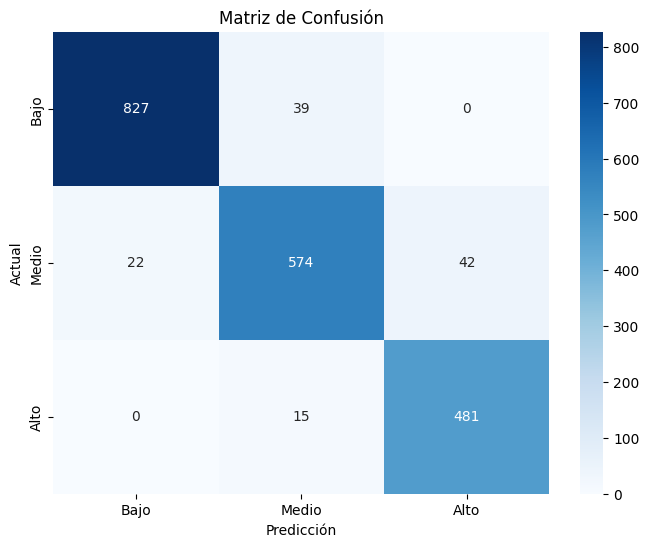

              precision    recall  f1-score   support

        Bajo       0.92      0.97      0.94       496
       Medio       0.97      0.95      0.96       866
        Alto       0.91      0.90      0.91       638

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [75]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las predicciones y los valores reales a categorías
bins = [0, 50, 70, 100]  # Definir los límites de las categorías
labels = ['Bajo', 'Medio', 'Alto']  # Etiquetas de las categorías

# Asumiendo que y_test y y_pred_test_rf ya están definidos
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_test_binned = pd.cut(y_pred_test_rf, bins=bins, labels=labels)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_binned, y_pred_test_binned, labels=labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(y_test_binned, y_pred_test_binned, target_names=labels))

Análisis por Clase

**Bajo Rendimiento:**
- Definición: Estudiantes cuyo Performance Index está entre 0 y 50.

- Verdaderos Positivos (VP): 827 estudiantes fueron correctamente clasificados como Bajo.
- Falsos Positivos (FP): 22 estudiantes fueron incorrectamente clasificados como Bajo pero en realidad son Medio.
- Falsos Negativos (FN): 39 estudiantes fueron incorrectamente clasificados como Medio pero en realidad son Bajo.
- Verdaderos Negativos (VN): La suma de todas las demás predicciones correctas que no son Bajo.

**Medio Rendimiento:**
- Definición: Estudiantes cuyo Performance Index está entre 50 y 70.

- Verdaderos Positivos (VP): 574 estudiantes fueron correctamente clasificados como Medio.
- Falsos Positivos (FP): 54 estudiantes fueron incorrectamente clasificados como Medio (39 de Bajo y 15 de Alto).
- Falsos Negativos (FN): 42 estudiantes fueron incorrectamente clasificados como Alto pero en realidad son Medio.
- Verdaderos Negativos (VN): La suma de todas las demás predicciones correctas que no son Medio.

**Alto Rendimiento:**
- Definición: Estudiantes cuyo Performance Index está entre 70 y 100.

- Verdaderos Positivos (VP): 481 estudiantes fueron correctamente clasificados como Alto.
- Falsos Positivos (FP): 42 estudiantes fueron incorrectamente clasificados como Alto pero en realidad son Medio.
- Falsos Negativos (FN): 15 estudiantes fueron incorrectamente clasificados como Medio- 
- pero en realidad son Alto.
- Verdaderos Negativos (VN): La suma de todas las demás predicciones correctas que no son Alto.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Crear una instancia del modelo de RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con escalado y RandomForestRegressor
pipeline_rf = Pipeline([
    ('scaler', scaler),  # Normalización de los datos
    ('rf', rf)  # Modelo de Random Forest Regressor
])

In [ ]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
# Hacer predicciones
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

# Evaluar el modelo
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"RMSE de entrenamiento: {train_rmse_rf}")
print(f"RMSE de prueba: {test_rmse_rf}")
print(f"R^2 de entrenamiento: {train_r2_rf}")
print(f"R^2 de prueba: {test_r2_rf}")

RMSE de entrenamiento: 0.9678563781589972
RMSE de prueba: 2.274186532254398
R^2 de entrenamiento: 0.9974591411611761
R^2 de prueba: 0.9860438960978474


**RMSE (Root Mean Squared Error)**

- RMSE de entrenamiento: 0.9678563781589972
- RMSE de prueba: 2.274186532254398

El RMSE para el conjunto de entrenamiento es aproximadamente 0.97, mientras que para el conjunto de prueba es aproximadamente 2.27.
La diferencia entre el RMSE de entrenamiento y el de prueba sugiere que el modelo tiene un rendimiento excelente en el conjunto de entrenamiento, pero su rendimiento disminuye en el conjunto de prueba, indicando un posible sobreajuste (overfitting). Esto significa que el modelo se ajusta muy bien a los datos de entrenamiento, pero no generaliza tan bien a los datos nuevos.

**R² (Coeficiente de Determinación)**

- R² de entrenamiento: 0.9974591411611761
- R² de prueba: 0.9860438960978474

El R² para el conjunto de entrenamiento es aproximadamente 0.997, lo que indica que el modelo explica casi toda la variabilidad de la variable objetivo en los datos de entrenamiento.
El R² para el conjunto de prueba es aproximadamente 0.986, lo que aún sugiere un alto nivel de precisión, pero confirma que el modelo es ligeramente menos preciso cuando se aplica a datos no vistos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Crear el pipeline con escalado y DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

pipeline_dt = Pipeline([
    ('scaler', scaler),  # Normalización de los datos
    ('dt', dt)  # Modelo de Decision Tree Regressor
])

In [ ]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_dt.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

In [ ]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_dt.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

In [ ]:
# Evaluar el modelo
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
train_r2_dt = r2_score(y_train, y_pred_train_dt)
test_r2_dt = r2_score(y_test, y_pred_test_dt)

print(f"RMSE de entrenamiento: {train_rmse_dt}")
print(f"RMSE de prueba: {test_rmse_dt}")
print(f"R^2 de entrenamiento: {train_r2_dt}")
print(f"R^2 de prueba: {test_r2_dt}")

RMSE de entrenamiento: 0.5063348694293136
RMSE de prueba: 2.9614303038303036
R^2 de entrenamiento: 0.9993046004930477
R^2 de prueba: 0.9763345340495422


**RMSE(Root Mean Squared Error)**

- RMSE de entrenamiento: 0.5063348694293136
- RMSE de prueba: 2.9614303038303036

El RMSE para el conjunto de entrenamiento es muy bajo (0.51), mientras que para el conjunto de prueba es considerablemente más alto (2.96).
La diferencia significativa entre el RMSE de entrenamiento y el de prueba sugiere que el modelo está sobreajustado (overfitting). Esto significa que el modelo se ajusta muy bien a los datos de entrenamiento, capturando incluso el ruido, pero no generaliza bien a los datos nuevos no vistos.

**R² (Coeficiente de Determinación)**

- R² de entrenamiento: 0.9993046004930477
- R² de prueba: 0.9763345340495422

El coeficiente de determinación (R²) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Los valores de R² varían de 0 a 1, donde un valor más cercano a 1 indica que el modelo explica mejor la variabilidad de la respuesta.